# CNN (CONVOLUTIONAL Neural Network) :

In [1]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from tensorflow.keras import layers, models
# from sklearn.metrics import roc_auc_score

# # Chargement du dataset
# df = pd.read_csv('../final_desequilibre.csv')

# # Séparation des features (X) et de la variable cible (y)
# X = df.drop('isFraud', axis=1)
# y = df['isFraud']

# # Division des données en ensembles d'entraînement, de validation et de test
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Remodelage des données pour une entrée CNN
# X_train = X_train.values.reshape(-1, X_train.shape[1], 1)  # Remarquez le remodelage ici
# X_validation = X_validation.values.reshape(-1, X_validation.shape[1], 1)
# X_test = X_test.values.reshape(-1, X_test.shape[1], 1)

# # Créez le modèle CNN
# model = models.Sequential()

# # Couche de convolution 1
# model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
# model.add(layers.MaxPooling1D(2))

# # Couche de convolution 2
# model.add(layers.Conv1D(64, 2, activation='relu'))
# model.add(layers.GlobalMaxPooling1D())  # Utilisation de GlobalMaxPooling1D au lieu de MaxPooling1D

# # Couche fully connected (densément connectée)
# model.add(layers.Dense(128, activation='relu'))

# # Couche de sortie
# model.add(layers.Dense(1, activation='sigmoid'))  # Une seule sortie binaire (fraude ou non)

# # Compilation du modèle
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',  # Binary cross-entropy pour une classification binaire
#               metrics=['accuracy'])

# # Entraînez le modèle
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

# # Prédictions sur l'ensemble de test
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5)  # Seuil de décision pour les prédictions binaires

# # Calcul des métriques
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# auc = roc_auc_score(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")
# print(f"auc-Score: {auc:.2f}")


Epoch 1/30
3056/3056 [==============================] - 10s 3ms/step - loss: 0.0647 - accuracy: 0.9825 - val_loss: 0.0439 - val_accuracy: 0.9874
Epoch 2/30
3056/3056 [==============================] - 10s 3ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0383 - val_accuracy: 0.9881
Epoch 3/30
3056/3056 [==============================] - 10s 3ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0304 - val_accuracy: 0.9907
Epoch 4/30
3056/3056 [==============================] - 9s 3ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0409 - val_accuracy: 0.9874
Epoch 5/30
3056/3056 [==============================] - 10s 3ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0259 - val_accuracy: 0.9917
Epoch 6/30
3056/3056 [==============================] - 9s 3ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0271 - val_accuracy: 0.9915
Epoch 7/30
3056/3056 [==============================] - 10s 3ms/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 0.0237 - val_accu

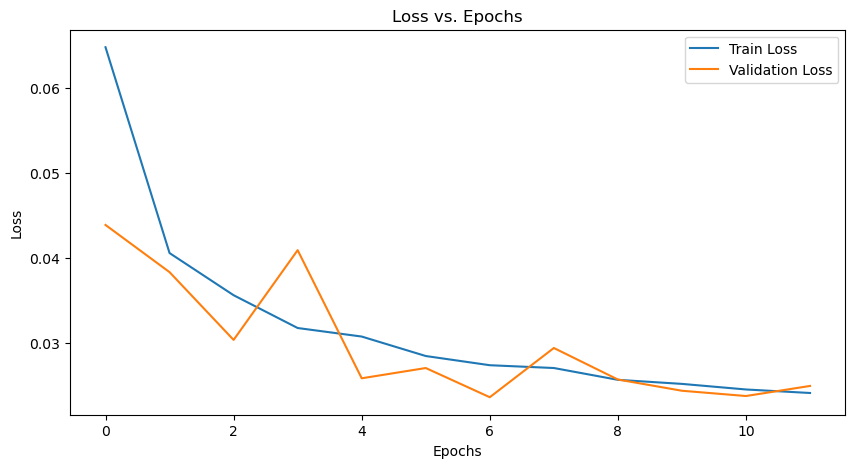

2038/2038 [==============================] - 3s 1ms/step
Accuracy: 0.992268397073036
Precision: 0.9296817172464841
Recall: 0.7543543543543544
F1 Score: 0.8328912466843502
AUC Score: 0.88


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Chargement du dataset
df = pd.read_csv('../final_desequilibre.csv')

# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalisation des données (par exemple, Min-Max scaling)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Remodelage des données pour une entrée CNN
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_validation = X_validation.reshape(-1, X_validation.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# Créez le modèle CNN
model = models.Sequential()

# Couche de convolution 1
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(2))

# Couche de convolution 2
model.add(layers.Conv1D(64, 2, activation='relu'))
model.add(layers.GlobalMaxPooling1D())

# Couche fully connected (densément connectée)
model.add(layers.Dense(128, activation='relu'))

# Couche de sortie
model.add(layers.Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Utilisation de Early Stopping pour éviter le surapprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraînez le modèle
history = model.fit(X_train, y_train, epochs=30, batch_size=64,
                    validation_data=(X_validation, y_validation),
                    callbacks=[early_stopping])

# Visualisation de l'historique d'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC Score: {auc:.2f}")


In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Calcul des métriques
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


cnn_results = pd.DataFrame([[' convolutional neurual network', acc,prec,rec, f1, auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Sauvegardez le DataFrame dans un fichier CSV
cnn_results.to_csv('../evaluations/cnn_results.csv', index=False)

cnn_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,convolutional neurual network,0.992268,0.929682,0.754354,0.832891,0.876429


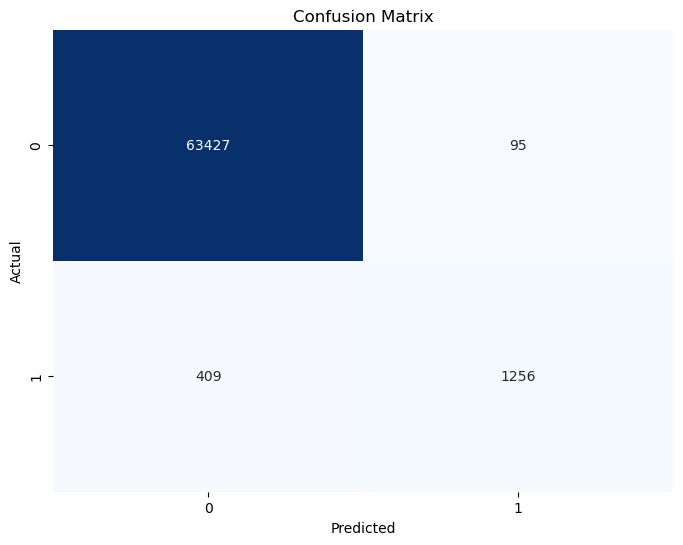

In [4]:

# Affichage de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

